# clustering customer data

## 1. load libraries and get data

In [13]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

customer_data = pd.read_csv("/Users/admin/Downloads/Retail Data v4 - unclean.csv")
customer_data[0:20]

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
5,22.9,Female,Single,18334.52,2854.59
6,43.5,Female,Married,36642.04,1926.37
7,28.0,Male,Single,34612.04,853.10
8,52.3,Female,Married,34779.79,NaN
9,27.2,Female,Single,21901.08,566.21


In [14]:
customer_data.isnull().sum().sum()

29

In [15]:
customer_data.isnull().sum()


Age             10
Gender           0
Married          0
Salary           9
Annual Spend    10
dtype: int64

<AxesSubplot:>

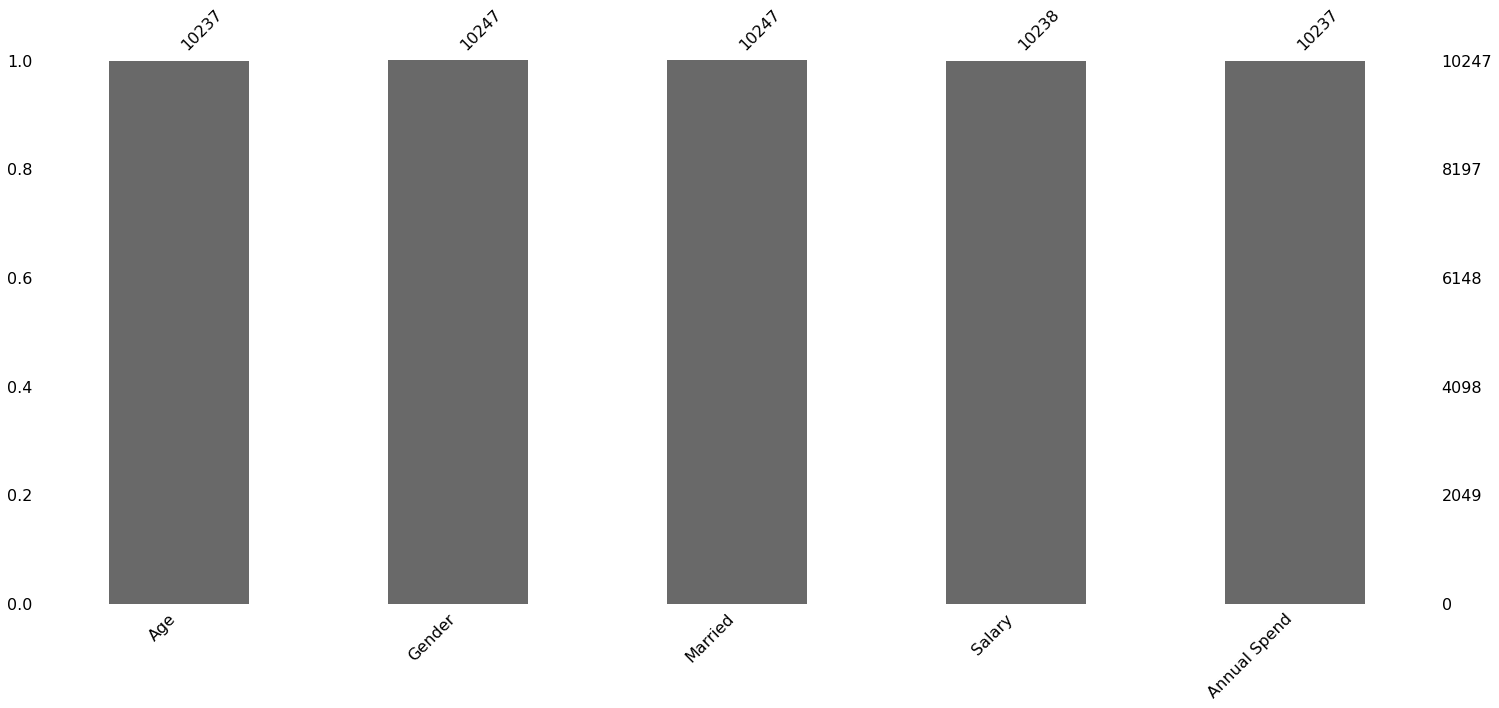

In [16]:
import missingno as msno
msno.bar(customer_data)

<AxesSubplot:>

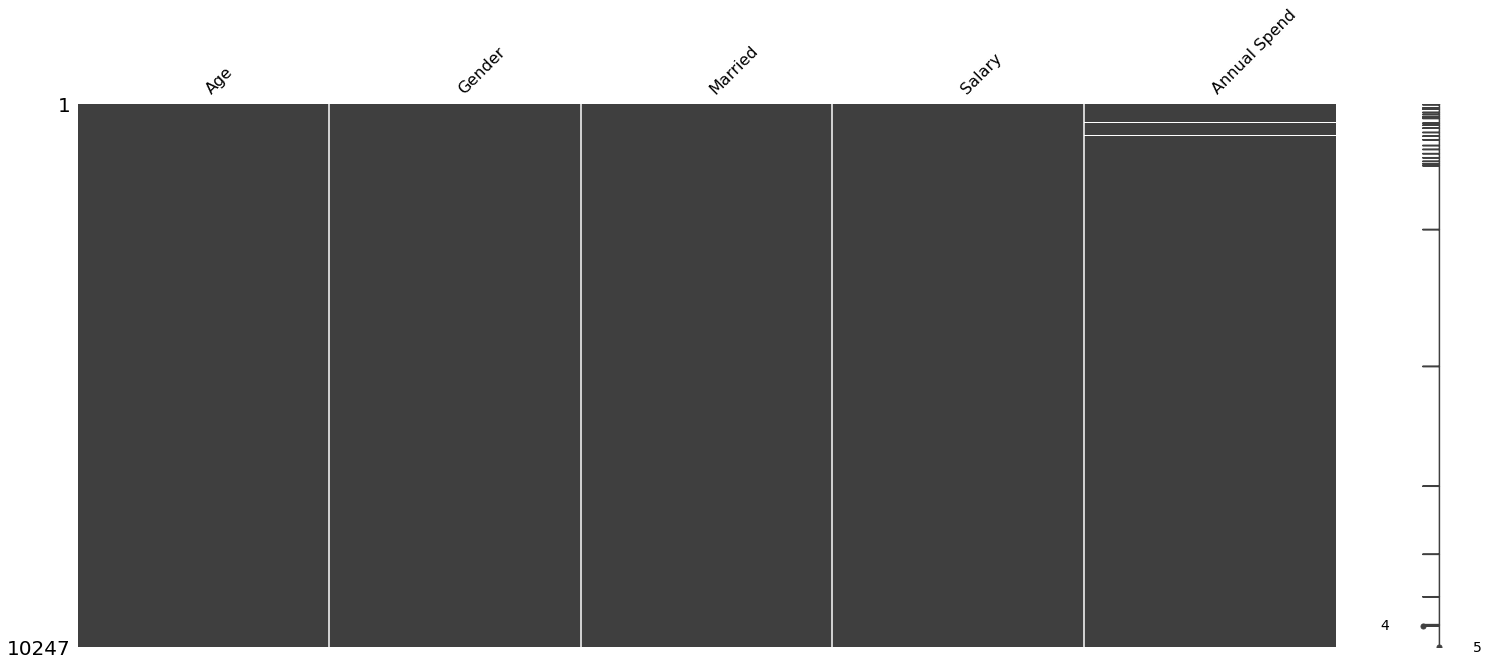

In [17]:
msno.matrix(customer_data)

In [18]:
customer_data['Age'].fillna(customer_data['Age'].mean(), inplace = True)
customer_data['Salary'].fillna(customer_data['Salary'].mean(), inplace = True)
customer_data['Annual Spend'].fillna(customer_data['Annual Spend'].mean(), inplace = True)

In [19]:
customer_data.isnull().sum().sum()

0

In [20]:
change1 = pd.get_dummies(customer_data['Gender'])
customer_data.drop('Gender', axis = 1, inplace = True)
customer_data = change1.join(customer_data)

In [21]:
change2 = pd.get_dummies(customer_data['Married'])
customer_data.drop('Married', axis = 1, inplace = True)
customer_data = change2.join(customer_data)

In [22]:
customer_data[0:5]

,Married,Single,Female,Male,Age,Salary,Annual Spend
0,0,1,0,1,28.2,26908.950000,331.56
1,1,0,1,0,43.5,39366.440000,3071.18
2,0,1,1,0,27.7,36629.132727,1357.19
3,0,1,0,1,18.9,26235.550000,769.78
4,0,1,0,1,18.0,30822.140000,100.00


## 4. visualise the data as a chart

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(customer_data.iloc[:, 4:7], figsize=(12,12))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Salary', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Salary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Spend'>,
        <AxesSubplot:xlabel='Salary', ylabel='Annual Spend'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Annual Spend'>]],
      dtype=object)

## 5.  scale the data

In [23]:
standardized_customer_data = preprocessing.scale(customer_data)
standardized_customer_data_df = pd.DataFrame(standardized_customer_data, columns = customer_data.columns)


## 6. decide the number of clusters 

### 6.1 silhouette method 

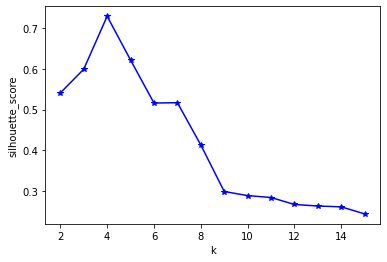

In [26]:
from sklearn import metrics
def k_silhouette(X, clusters):
    K = range(2, clusters + 1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    
    plt.plot(K,S,'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    plt.show()

k_silhouette(standardized_customer_data_df, 15)
# 4 is the best number of K 

## 7. cluster the data 

In [28]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(standardized_customer_data_df)

KMeans(n_clusters=4)

In [29]:
y_km = kmeans.fit_predict(standardized_customer_data_df)

## 8. review the result 

In [31]:
print(y_km[0:20])

[2 1 0 2 2 0 1 2 1 0 1 0 0 1 0 0 1 0 3 0]


In [34]:
print(customer_data[y_km == 2] [0:10])

    Married  Single  Female  Male   Age    Salary  Annual Spend
0         0       1       0     1  28.2  26908.95        331.56
3         0       1       0     1  18.9  26235.55        769.78
4         0       1       0     1  18.0  30822.14        100.00
7         0       1       0     1  28.0  34612.04        853.10
25        0       1       0     1  40.3  30670.10        630.37
29        0       1       0     1  23.8  34838.14        315.42
31        0       1       0     1  29.6  23847.97        100.00
33        0       1       0     1  19.4  32387.29        295.67
37        0       1       0     1  24.2  29968.47        185.96
42        0       1       0     1  18.3  38359.29        749.84


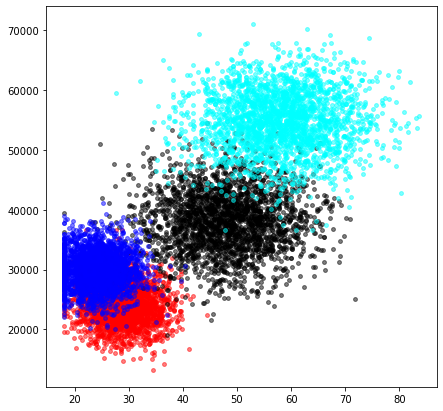

In [38]:
plt.figure(figsize = (7,7))
plt.scatter(customer_data[y_km == 0]['Age'], customer_data[y_km == 0]['Salary'],
           s = 15, c = 'red', alpha = 0.5)
plt.scatter(customer_data[y_km == 1]['Age'], customer_data[y_km == 1]['Salary'],
           s = 15, c = 'black', alpha = 0.5)
plt.scatter(customer_data[y_km == 2]['Age'], customer_data[y_km == 2]['Salary'],
           s = 15, c = 'blue', alpha = 0.5)
plt.scatter(customer_data[y_km == 3]['Age'], customer_data[y_km == 3]['Salary'],
           s = 15, c = 'cyan', alpha = 0.5)

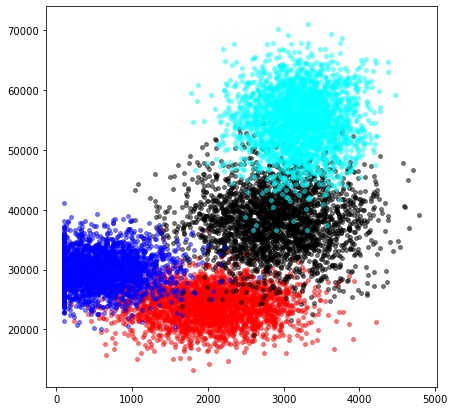

In [44]:
plt.figure(figsize = (7,7))
plt.scatter(customer_data[y_km == 0]['Annual Spend'], customer_data[y_km == 0]['Salary'],
           s = 15, c = 'red', alpha = 0.5)
plt.scatter(customer_data[y_km == 1]['Annual Spend'], customer_data[y_km == 1]['Salary'],
           s = 15, c = 'black', alpha = 0.5)
plt.scatter(customer_data[y_km == 2]['Annual Spend'], customer_data[y_km == 2]['Salary'],
           s = 15, c = 'blue', alpha = 0.5)
plt.scatter(customer_data[y_km == 3]['Annual Spend'], customer_data[y_km == 3]['Salary'],
           s = 15, c = 'cyan', alpha = 0.5)

In [40]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(20,20)
ax.set_xlabel('Annual Spend')
ax.set_ylabel('Salary')
ax.set_ylabel('Age')
ax.scatter(customer_data[y_km == 0]['Annual Spend'], customer_data[y_km == 0]['Salary'],customer_data[y_km == 0]['Age'],
           s = 15, c = 'red', alpha = 0.3)
ax.scatter(customer_data[y_km == 1]['Annual Spend'], customer_data[y_km == 1]['Salary'],customer_data[y_km == 1]['Age'],
           s = 15, c = 'black', alpha = 0.3)
ax.scatter(customer_data[y_km == 2]['Annual Spend'], customer_data[y_km == 2]['Salary'],customer_data[y_km == 2]['Age'],
           s = 15, c = 'blue', alpha = 0.3)
ax.scatter(customer_data[y_km == 3]['Annual Spend'], customer_data[y_km == 3]['Salary'],customer_data[y_km == 3]['Age'],
           s = 15, c = 'cyan', alpha = 0.3)

Using matplotlib backend: MacOSX


# Notes: 
# 1.Cluster: Kmeans method.
# 2. plot 2d 3d